# Overview

---



This project aims to analyze the effectiveness of a bank's marketing campaign by examining customer demographics, financial status, and past interactions. The analysis will provide insights into customer behavior and identify key factors influencing whether a client subscribes to a term deposit.

# Goal

---


The main objective of this project is to provide actionable insights for improving the bank's marketing strategy. Specifically to answer the following questions:

Customer Profiling:

1. What are the key characteristics of customers who subscribe to a term deposit?
2. What are the most common demographic and financial traits of potential subscribers?

Campaign Effectiveness:

1. How successful was the last marketing campaign?
2. What factors contributed to campaign success or failure?

Key Influencing Factors:

1. How does past interaction with the bank influence the likelihood of subscription?

Predictive Analysis:

1. Which model performs best in predicting customer behavior?
2. Which features are most important in model building?

# Libraries Import

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

# Data Load

In [ ]:
# get data from drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data

df = pd.read_csv('/content/drive/MyDrive/Data Project/banking_dataset.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Informations

In [ ]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


This dataset contains 17 columns and 45211 rows. There are 10 columns that have object values, the rest of the columns are columns that have integer values.

# Data Exploration

In [ ]:
# check null values

df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


After checking for null values, it can be seen that there are no null values in the dataset.

In [ ]:
# check duplicated values

df.duplicated().sum()

0

There are no duplicated values in the dataset. This means the dataset is clean and further analysis can be performed.

## Age Distribution

In [ ]:
# descriptive statistics

mean_age = df['age'].mean()
median_age = df['age'].median()
max_age = df['age'].max()
min_age = df['age'].min()

print(f'Mean Age:{mean_age:.2f}')
print(f'Median Age: {median_age:.2f}')
print(f'Max Age: {max_age:.2f}')
print(f'Min Age: {min_age:.2f}')

Mean Age:40.94
Median Age: 39.00
Max Age: 95.00
Min Age: 18.00


**Key Insight**

---



Average age of marketing target is around 41 years, while the youngest target age is 18 and the oldest target age is 95 years old. The age median 39 years represent the middle value when target ages are sorted.

There is a big gap between target ages, which indicates a wide range of ages.

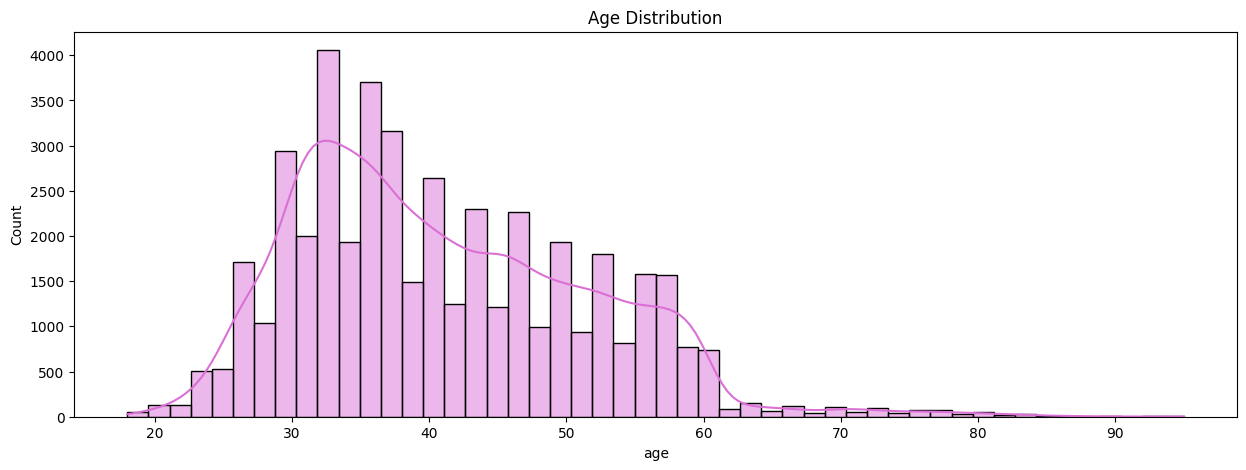

In [ ]:
# age distribution

plt.figure(figsize=(15,5))
sns.histplot(df['age'], bins=50, kde=True, color='orchid')
plt.title('Age Distribution')
plt.show()

**Key Insight**

---

The age distribution can be seen in the histogram.  The distribution of ages is right-skewed with most targets age range is about 30 to 50 years old. There are fewer customers above 60 years old.

## Categorical Columns Analysis

In [ ]:
# categorical columns distribution

df_job = df['job'].value_counts().sort_values().index
df_month = df['month'].value_counts().sort_values().index
df_marital = df['marital'].value_counts().sort_values().index
df_education = df['education'].value_counts().sort_values().index
df_default = df['default'].value_counts().sort_values().index
df_housing = df['housing'].value_counts().sort_values().index
df_loan = df['loan'].value_counts().sort_values().index
df_contact = df['contact'].value_counts().sort_values().index
df_poutcome = df['poutcome'].value_counts().sort_values().index


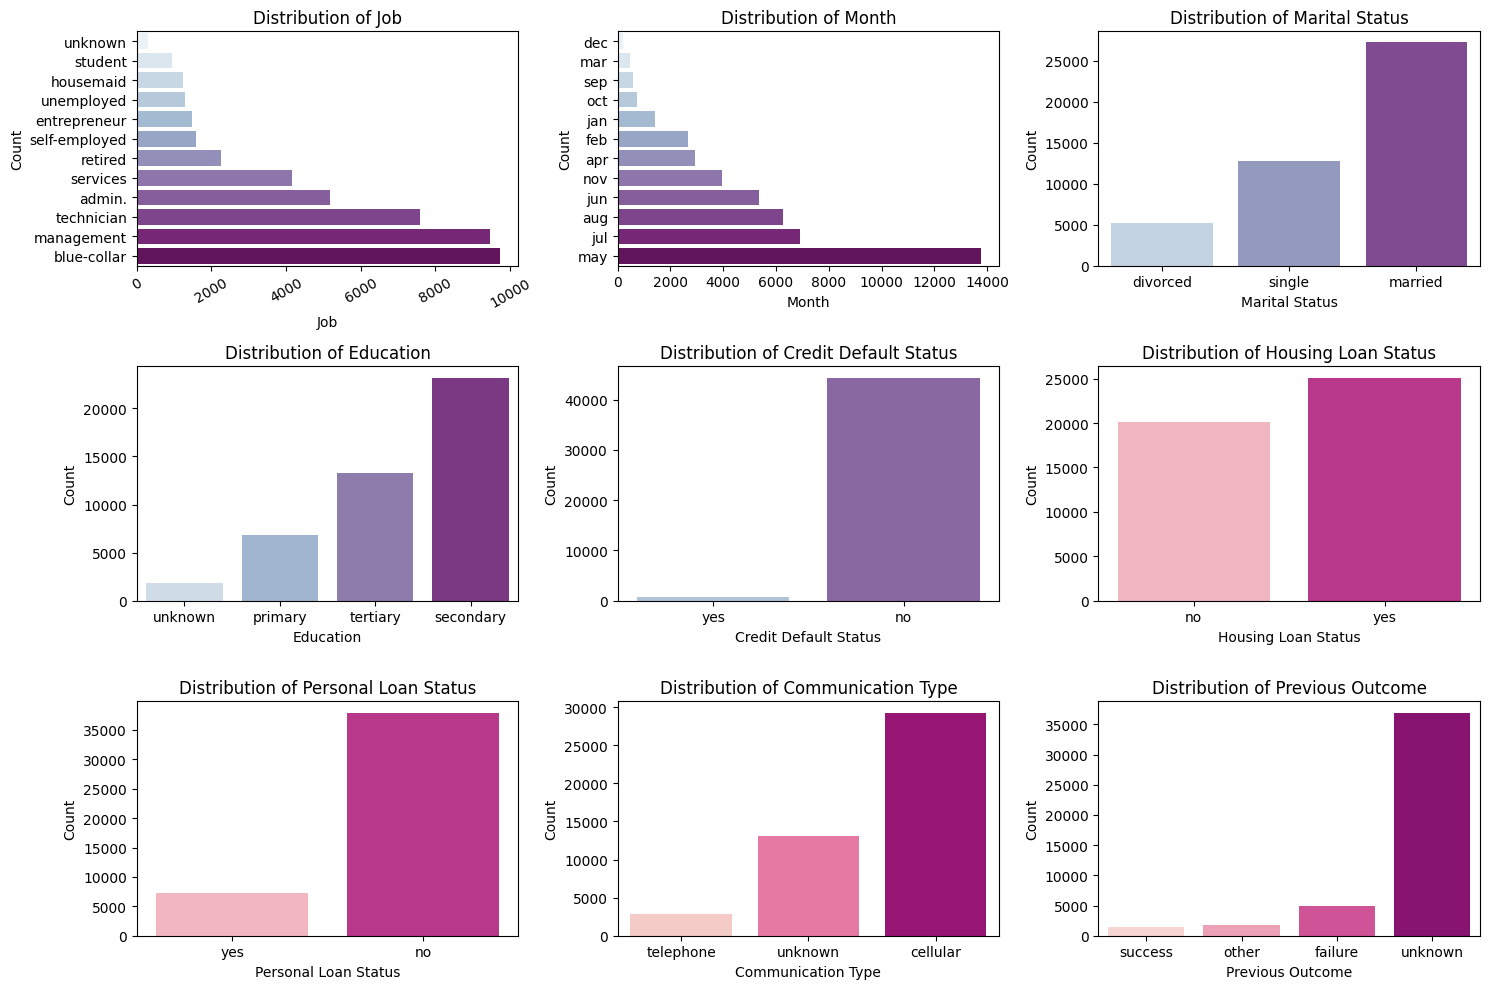

In [ ]:
# visualization

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(y='job', data=df, ax=axes[0, 0], palette='BuPu', order=df_job)
axes[0, 0].set_title('Distribution of Job')
axes[0, 0].set_xlabel('Job')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=30)

sns.countplot(y='month', data=df, ax=axes[0, 1], palette='BuPu', order=df_month)
axes[0, 1].set_title('Distribution of Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='marital', data=df, ax=axes[0, 2], palette='BuPu', order=df_marital)
axes[0, 2].set_title('Distribution of Marital Status')
axes[0, 2].set_xlabel('Marital Status')
axes[0, 2].set_ylabel('Count')

sns.countplot(x='education', data=df, ax=axes[1, 0], palette='BuPu', order=df_education)
axes[1, 0].set_title('Distribution of Education')
axes[1, 0].set_xlabel('Education')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='default', data=df, ax=axes[1, 1], palette='BuPu', order=df_default)
axes[1, 1].set_title('Distribution of Credit Default Status')
axes[1, 1].set_xlabel('Credit Default Status')
axes[1, 1].set_ylabel('Count')

sns.countplot(x='housing', data=df, ax=axes[1, 2], palette='RdPu', order=df_housing)
axes[1, 2].set_title('Distribution of Housing Loan Status')
axes[1, 2].set_xlabel('Housing Loan Status')
axes[1, 2].set_ylabel('Count')

sns.countplot(x='loan', data=df, ax=axes[2, 0], palette='RdPu', order=df_loan)
axes[2, 0].set_title('Distribution of Personal Loan Status')
axes[2, 0].set_xlabel('Personal Loan Status')
axes[2, 0].set_ylabel('Count')

sns.countplot(x='contact', data=df, ax=axes[2, 1], palette='RdPu', order=df_contact)
axes[2, 1].set_title('Distribution of Communication Type')
axes[2, 1].set_xlabel('Communication Type')
axes[2, 1].set_ylabel('Count')

sns.countplot(x='poutcome', data=df, ax=axes[2, 2], palette='RdPu', order=df_poutcome)
axes[2, 2].set_title('Distribution of Previous Outcome')
axes[2, 2].set_xlabel('Previous Outcome')
axes[2, 2].set_ylabel('Count')


plt.tight_layout()
plt.show()


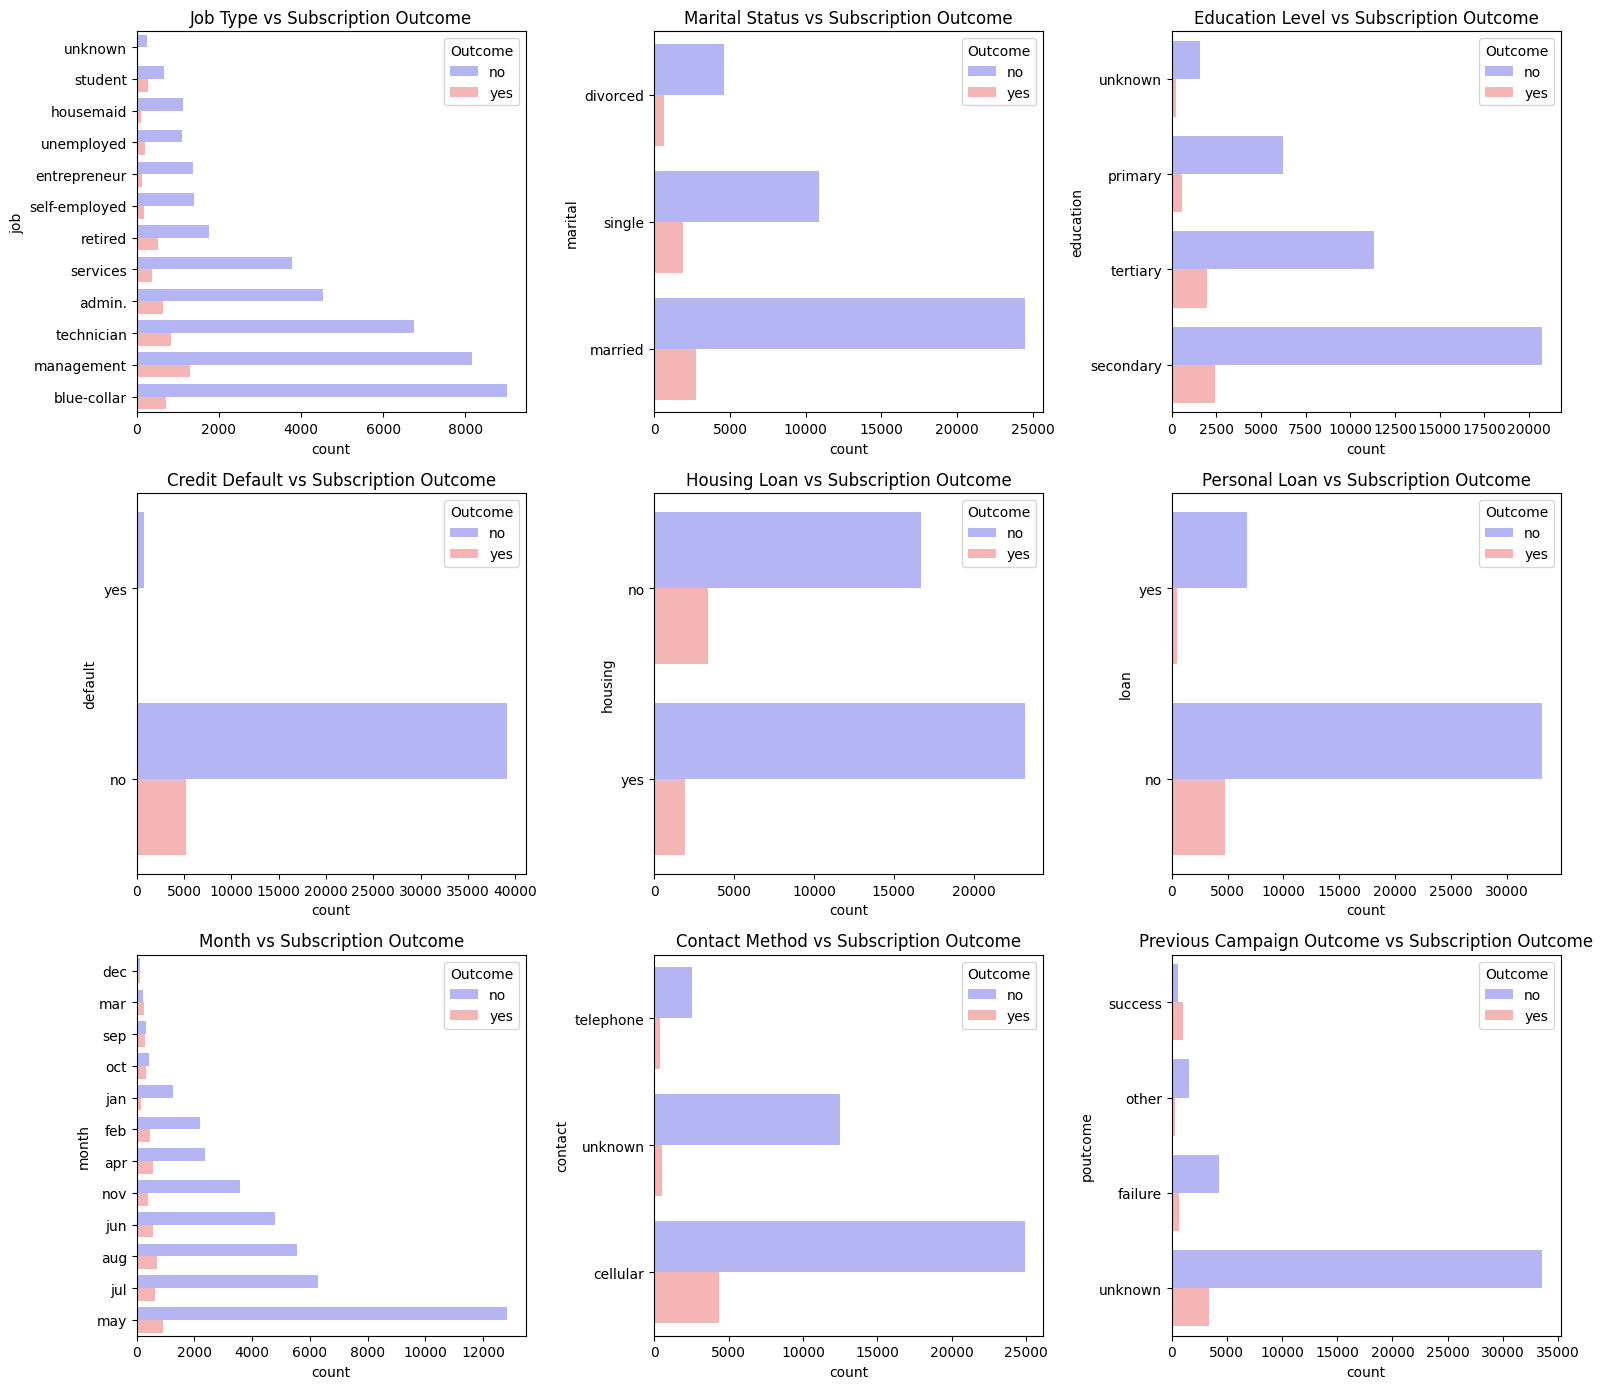

In [ ]:
# categorical columns vs Subscription Outcome

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'contact', 'poutcome']
title_map2 = {
    "job": "Job Type",
    "marital": "Marital Status",
    "education": "Education Level",
    "default": "Credit Default",
    "housing": "Housing Loan",
    "loan": "Personal Loan",
    'month': "Month",
    "contact": "Contact Method",
    "poutcome": "Previous Campaign Outcome"
}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
axes = axes.flatten()


for i, col in enumerate(categorical_cols):
    sorted_categories = df[col].value_counts().sort_values().index
    sns.countplot(y=df[col], hue=df['y'], palette='bwr', order=sorted_categories, ax=axes[i])
    axes[i].set_title(f'{title_map2[col]} vs Subscription Outcome')
    axes[i].legend(title='Outcome')

plt.tight_layout()
plt.show()

In [ ]:
# Create dictionaries to store DataFrames for each category
success_rate_dfs = {}
success_count_dfs = {}

for col in categorical_cols:
    counts = df.groupby(col)['y'].value_counts().unstack()
    if 'yes' in counts.columns:
        filtered_counts = counts['yes'].dropna()
        total_counts = counts.sum(axis=1).dropna()
        valid_indices = total_counts.index.intersection(filtered_counts.index)  # Ensure matching indices
        success_rate = (filtered_counts.loc[valid_indices] / total_counts.loc[valid_indices] * 100)

        # Store in separate DataFrames
        success_rate_df = pd.DataFrame(success_rate, columns=['Success Rate']).reset_index()

        # Sort values for better visualization
        success_rate_df = success_rate_df.sort_values(by='Success Rate', ascending=False)

        # Store each category DataFrame
        success_rate_dfs[col] = success_rate_df

        # Display each category DataFrame
        print(f"\n{'='*50}\nSuccess Rate for {col}:\n{'='*50}\n")
        display(success_rate_df)


Success Rate for job:



,job,Success Rate
8,student,28.678038
5,retired,22.791519
10,unemployed,15.502686
4,management,13.755551
0,admin.,12.202669
6,self-employed,11.842939
11,unknown,11.805556
9,technician,11.056996
7,services,8.883004
3,housemaid,8.790323



Success Rate for marital:



,marital,Success Rate
2,single,14.949179
0,divorced,11.945458
1,married,10.123466



Success Rate for education:



,education,Success Rate
2,tertiary,15.006390
3,unknown,13.570275
1,secondary,10.559435
0,primary,8.626478



Success Rate for default:



,default,Success Rate
0,no,11.796108
1,yes,6.380368



Success Rate for housing:



,housing,Success Rate
0,no,16.702355
1,yes,7.699960



Success Rate for loan:



,loan,Success Rate
0,no,12.655727
1,yes,6.681391



Success Rate for month:



,month,Success Rate
7,mar,51.991614
2,dec,46.728972
11,sep,46.459413
10,oct,43.766938
0,apr,19.679400
3,feb,16.647792
1,aug,11.013286
6,jun,10.222805
9,nov,10.151134
4,jan,10.121169



Success Rate for contact:



,contact,Success Rate
0,cellular,14.918900
1,telephone,13.420509
2,unknown,4.070661



Success Rate for poutcome:



,poutcome,Success Rate
2,success,64.725347
1,other,16.684783
0,failure,12.609671
3,unknown,9.161503


**Key Insight**

---

1. The most common target marketing jobs are blue-collar workers, followed by management, and technicians. The least marketing target jobs are student, housemaid, and unknown.
Students and retired individuals have a relatively high rate of subscribing to term deposits compared to other jobs.
2. The highest campaign time happens in May, July, and August. Otherwise, in March, September, and December the campaign has its lowest time but shows a high subscription rate despite lower contact volumes.
3. Most of the marketing targets are married. The subscription rate is slightly higher for single clients compared to married or divorced individuals.
4. Targets with tertiary education have a higher subscription rate than those with tertiary or primary education.
5. Customers without credit defaults have a significantly higher subscription rate, while those who have defaulted rarely subscribe.
6. Target with housing loans are more numerous but their subscription rate is slightly lower than those without housing loans
7. Clients without personal loans have a higher subscription rate than those with personal loans.
8. Most of the campaign communication is done by cellular phone and the subscription rate is higher compared to others.
9. From the previous campaign, most of the target marketers were 'unknown' or it could not be ascertained whether the target marketers had subscribed to time deposits or not. Those with a successful past campaign have the highest subscription rate, while those with a failed previous campaign are less likely to subscribe again.

## Numerical Columns Analysis

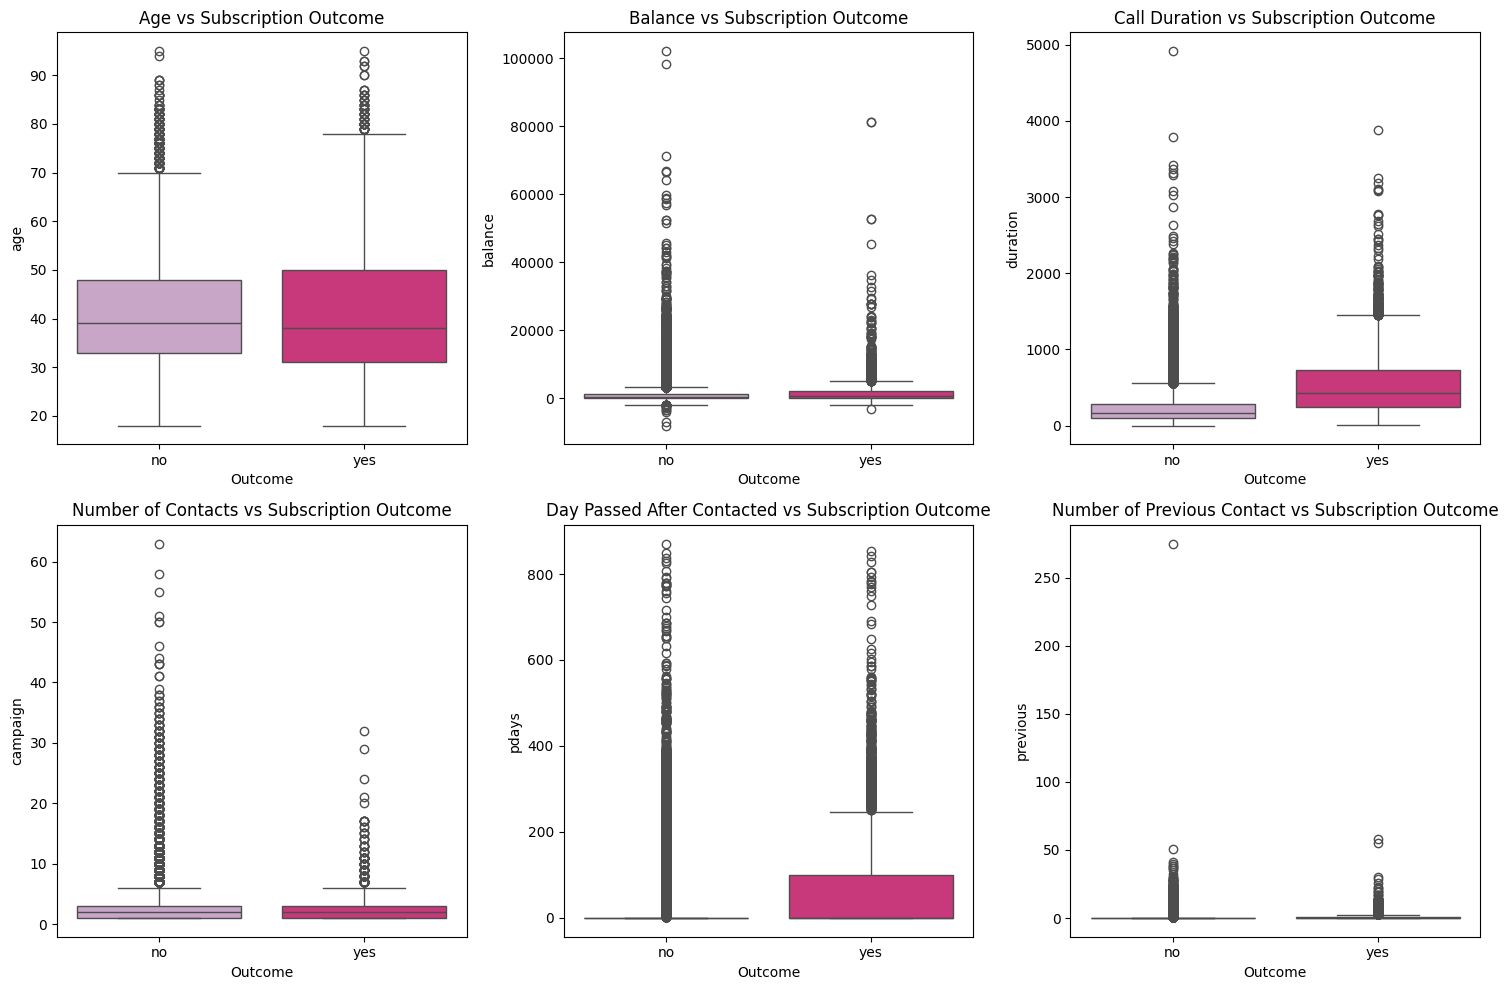

In [ ]:
# numerical columns vs Subscription Outcome

numerical_cols = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
title_map = {'age': 'Age',
             'balance': 'Balance',
             'duration': 'Call Duration',
             'campaign': 'Number of Contacts',
             'pdays': 'Day Passed After Contacted',
             'previous': 'Number of Previous Contact'}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df['y'], y=df[col], palette='PuRd', ax=axes[i])
    axes[i].set_title(f'{title_map[col]} vs Subscription Outcome')
    axes[i].set_xlabel('Outcome')

plt.tight_layout()
plt.show()

**Key Insight**

---


1. **Age vs Subscription Outcome**: The age distribution for both "yes" and "no" outcomes are quite similar, the median age is slightly higher for customers who subscribed. In both categories, there are more outliers but they are evenly spread
2. **Balance vs Subscription Outcome**: Most targets have a balance close to zero, but there are extreme outliers. The balance distribution is slightly higher for targets who subscribed
3. **Call Duration vs Subscription Outcom**e: The median for call duration is slightly higher for the target who subscribed.
4. **Number of Contacts vs Subscription Outcome**: Most successful subscriptions happened when the target was contacted fewer times.
5. **Days Passed After Contacted vs Subscription Outcome**: Many successful subscriptions happened within a shorter time after the previous contact.
6. **Number of Previous Contact vs Subscription Outcome**: Most targets had very few previous contacts before the campaign. There are few extreme outliers but they do not appear to influence subscription rate significantly

From some of these boxplots, it can be seen that there are many outliers in the data. It is necessary to do outliers handling so that the analysis results can be maximized.

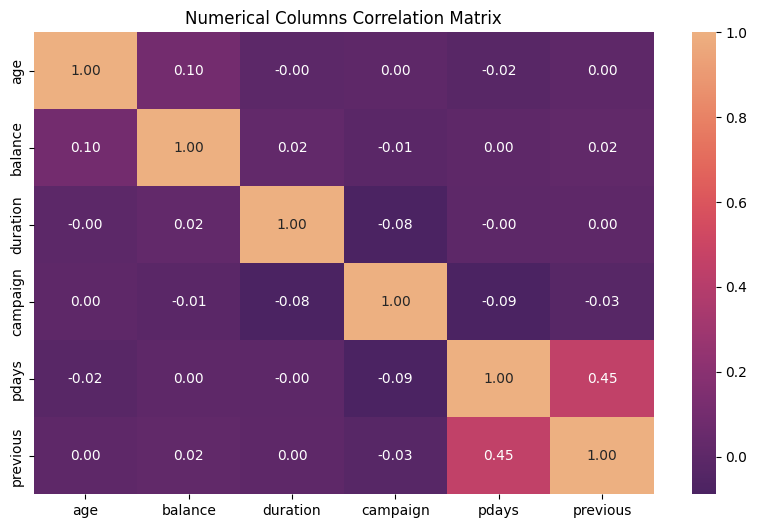

In [ ]:
# correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='flare_r', fmt='.2f')
plt.title('Numerical Columns Correlation Matrix')
plt.show()

**Key Insight**

---



Most numerical columns correlate close to 0, indicating weak or no relationship between most variables.

The strongest correlations occurred between `pdays` and `previous` (0.45), other strong correlations occurred between age vs balance (0.10) and duration vs campaign (-0.08).

## Number of Contacts, Call Duration, and Subscription Status Plot

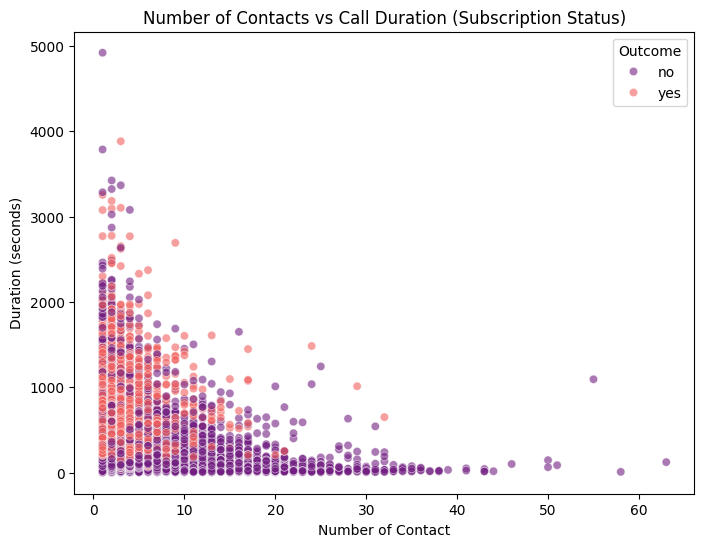

In [ ]:
# Number of Contacts and Call Duration Interaction to Subscription Status

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['campaign'], y=df['duration'], hue=df['y'], alpha=0.6, palette='magma')
plt.legend(title='Outcome')
plt.ylabel('Duration (seconds)')
plt.xlabel('Number of Contact')
plt.title('Number of Contacts vs Call Duration (Subscription Status)')
plt.show()

**Key Insight**

---


The majority of the dots are clustered near the bottom of the chart, this suggests that most calls are relatively short. The trend shows that as call duration increases, the "yes" responses from the target also increase. This means higher call durations have more positive outcomes.

There are several targets contacted more than 10 times, but the majority of the results were "no". This implies that frequent calls do not guarantee success.

## Subscription Percentage

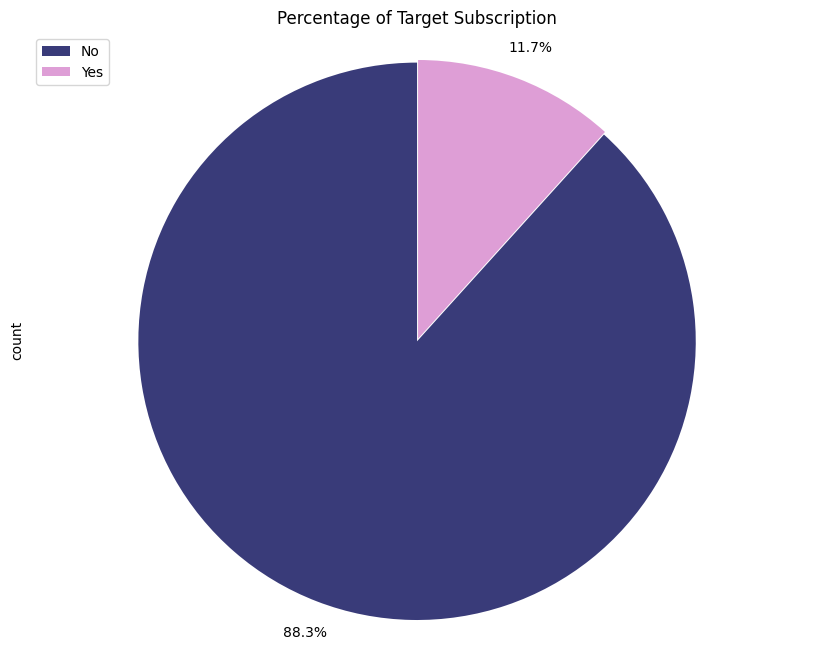

In [ ]:
# subscription percentage

df_y = df['y'].value_counts()

plt.figure(figsize=(8, 8))
df['y'].value_counts().plot(kind='pie', figsize=(10,8),
                            autopct='%1.1f%%', pctdistance=1.12, explode=[0.005,0.005],
                            startangle=90, labels=None, colormap='tab20b')

plt.legend(labels=['No','Yes'], loc='upper left')
plt.axis('equal')
plt.title('Percentage of Target Subscription')

plt.show()

**Key Insight**

---


From all of marketing targets, only about 12% of target subscribe, while the remaining 88% refuse to subscribe.

There is an imbalance in classes in the data, to solve it, it needs to be resampled at the next step of analysis.

# Outliers Check and Handling

In [ ]:
# data distribution and outliers check

def check_distribution_and_outliers(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numerical_cols:
        skew = df[col].skew()
        print(f'Skewness {col}: {skew:.2f} ')

        # Identify whether the distribution is skewed
        if skew < -0.5 or skew > 0.5:
            if skew < -1 or skew > 1:
                print('Skewed Distribution - Extreme')
            else:
                print('Skewed Distribution - Not Extreme')
        else:
            print('Normal Distribution')

        # Calculate IQR-based outlier boundaries
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        in_outlier = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f'Outlier percentage: {(len(in_outlier) / len(df) * 100):.2f}%\n')

print('Checking Distribution and Outliers Before Handling...\n')
check_distribution_and_outliers(df)

Checking Distribution and Outliers Before Handling...

Skewness age: 0.68 
Skewed Distribution - Not Extreme
Outlier percentage: 1.08%

Skewness balance: 8.36 
Skewed Distribution - Extreme
Outlier percentage: 10.46%

Skewness day: 0.09 
Normal Distribution
Outlier percentage: 0.00%

Skewness duration: 3.14 
Skewed Distribution - Extreme
Outlier percentage: 7.16%

Skewness campaign: 4.90 
Skewed Distribution - Extreme
Outlier percentage: 6.78%

Skewness pdays: 2.62 
Skewed Distribution - Extreme
Outlier percentage: 18.26%

Skewness previous: 41.85 
Skewed Distribution - Extreme
Outlier percentage: 18.26%



There are 5 numerical columns that have extreme outliers. The extreme outliers need to be handled so it not affect further analysis result.

In [ ]:
# outliers handling

def handle_outliers(df):
    df_cleaned = df.copy()
    numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

    for col in numerical_cols:
        skew = df_cleaned[col].skew()

        if skew < -1 or skew > 1:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound,
                                       np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col]))

    return df_cleaned

new_df = handle_outliers(df)

print('Checking Distribution After Handling Extreme Outliers...\n')
check_distribution_and_outliers(new_df)

Checking Distribution After Handling Extreme Outliers...

Skewness age: 0.68 
Skewed Distribution - Not Extreme
Outlier percentage: 1.08%

Skewness balance: 1.10 
Skewed Distribution - Extreme
Outlier percentage: 0.00%

Skewness day: 0.09 
Normal Distribution
Outlier percentage: 0.00%

Skewness duration: 1.04 
Skewed Distribution - Extreme
Outlier percentage: 0.00%

Skewness campaign: 1.10 
Skewed Distribution - Extreme
Outlier percentage: 0.00%

Skewness pdays: 0.00 
Normal Distribution
Outlier percentage: 0.00%

Skewness previous: 0.00 
Normal Distribution
Outlier percentage: 0.00%



In [ ]:
# check new df

new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no


# Label Encode

In [ ]:
# copy df

df_encoded = new_df.copy()
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no


In [ ]:
# ordinal encoding for ordinal categorical

df_encoded['education'] = df_encoded['education'].astype(str).str.strip().str.lower()
df_encoded['month'] = df_encoded['month'].astype(str).str.strip().str.lower()
df_encoded['y'] = df_encoded['y'].astype(str).str.strip().str.lower()

education_encode = OrdinalEncoder(categories=[['primary','secondary', 'tertiary','unknown']])
df_encoded[['education']] = education_encode.fit_transform(df_encoded[['education']])

month_encode = OrdinalEncoder(categories=[['jan','feb','mar','apr',
                                          'may','jun','jul','aug',
                                          'sep','oct','nov','dec']])
df_encoded[['month']] = month_encode.fit_transform(df_encoded[['month']])

y_encode = OrdinalEncoder(categories=[['no', 'yes']])
df_encoded[['y']] = y_encode.fit_transform(df_encoded[['y']])

df_encoded['education'] = df_encoded['education'].astype(int)
df_encoded['month'] = df_encoded['month'].astype(int)
df_encoded['y'] = df_encoded['y'].astype(int)

df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2,no,2143.0,yes,no,unknown,5,4,261.0,1.0,-1.0,0.0,unknown,0
1,44,technician,single,1,no,29.0,yes,no,unknown,5,4,151.0,1.0,-1.0,0.0,unknown,0
2,33,entrepreneur,married,1,no,2.0,yes,yes,unknown,5,4,76.0,1.0,-1.0,0.0,unknown,0
3,47,blue-collar,married,3,no,1506.0,yes,no,unknown,5,4,92.0,1.0,-1.0,0.0,unknown,0
4,33,unknown,single,3,no,1.0,no,no,unknown,5,4,198.0,1.0,-1.0,0.0,unknown,0


In [ ]:
# one-hot encode for nominal categorical

df_encoded = pd.get_dummies(df_encoded, drop_first=True)
df_encoded = df_encoded.replace({True:1,False:0})
df_encoded.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143.0,5,4,261.0,1.0,-1.0,0.0,0,...,1,0,0,1,0,0,1,0,0,1
1,44,1,29.0,5,4,151.0,1.0,-1.0,0.0,0,...,0,1,0,1,0,0,1,0,0,1
2,33,1,2.0,5,4,76.0,1.0,-1.0,0.0,0,...,1,0,0,1,1,0,1,0,0,1
3,47,3,1506.0,5,4,92.0,1.0,-1.0,0.0,0,...,1,0,0,1,0,0,1,0,0,1
4,33,3,1.0,5,4,198.0,1.0,-1.0,0.0,0,...,0,1,0,0,0,0,1,0,0,1


# Modelling

In [ ]:
# split data

X = df_encoded.drop(['y'],axis=1)
y = df_encoded[['y']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# resampling

from imblearn.over_sampling import SMOTE

resampling = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = resampling.fit_resample(X_train, y_train)

The data needs to be resampled because the proportion of categories in column `y` is not balanced.

In [ ]:
# best model

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier()
}

results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    results.append((name, np.mean(scores)))

best_model_name, best_score = max(results, key=lambda x: x[1])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_score:.4f}")

Best Model: Random Forest
Best Accuracy: 0.9210


In [ ]:
# tuning parameter

param_grid = {'n_estimators':[50, 300, 500]}


grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Best Hyperparameter: {grid_search.best_params_}")
print(f'Best Accuracy:', grid_search.best_score_)

Best Hyperparameter: {'n_estimators': 50}
Best Accuracy: 0.9219268063809822


In [ ]:
# predict data

model_rf = grid_search.best_estimator_

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test)

In [ ]:
# model evaluation

print('Accuracy Train Set:', model_rf.score(X_train_resampled,y_train_resampled))
print('Accuracy Test Set:', model_rf.score(X_test,y_test))

Accuracy Train Set: 0.9998592430403503
Accuracy Test Set: 0.887316156142873


In [ ]:
# classification report

from sklearn.metrics import classification_report

print('Classification Report Train Set: \n',classification_report(y_train_resampled,y_pred_train_rf))
print('Classification Report Test Set: \n',classification_report(y_test,y_pred_test_rf))

Classification Report Train Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31970
           1       1.00      1.00      1.00     31970

    accuracy                           1.00     63940
   macro avg       1.00      1.00      1.00     63940
weighted avg       1.00      1.00      1.00     63940

Classification Report Test Set: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7952
           1       0.53      0.51      0.52      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.72      0.73      9043
weighted avg       0.88      0.89      0.89      9043



**Key Insight**

---



From the model evaluation results, the model perfectly classifies the training data (accuracy 100%). The model performs well on test data but its accuracy is lower than the training accuracy which suggests an overfitting issue. Based on the classification report results, the model correctly identifies most negative samples (high precision, recall, and f-1 score) but struggles to classify the minority class correctly (low precision, recall, and f-1 score).
The model performs well in the majority class (0) but struggles with the minority class (1).

              Feature  Importance
5            duration    0.276521
29   poutcome_unknown    0.085867
23        housing_yes    0.083278
26    contact_unknown    0.058776
4               month    0.057184
6            campaign    0.057156
2             balance    0.053419
0                 age    0.048978
3                 day    0.048641
20    marital_married    0.038979
9     job_blue-collar    0.030596
24           loan_yes    0.024521
17     job_technician    0.022178
21     marital_single    0.019221
1           education    0.016801
12     job_management    0.015138
15       job_services    0.013159
27     poutcome_other    0.010343
25  contact_telephone    0.006299
28   poutcome_success    0.005366
14  job_self-employed    0.004875
13        job_retired    0.004715
18     job_unemployed    0.004634
10   job_entrepreneur    0.004481
11      job_housemaid    0.004295
16        job_student    0.002620
19        job_unknown    0.000992
22        default_yes    0.000970
7             

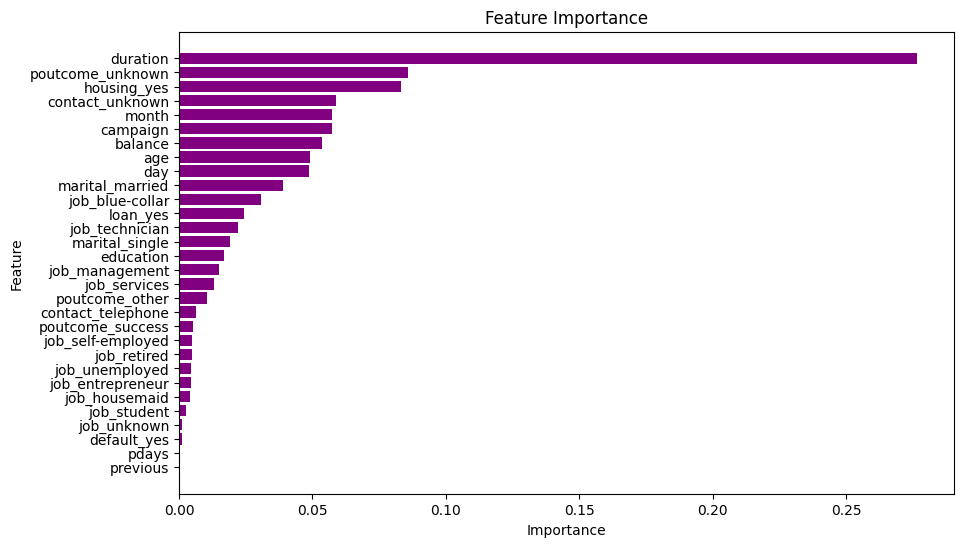

In [ ]:
# features importance

importances = model_rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

def plot_feature_importance(importance_df):
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()

print(importance_df)
plot_feature_importance(importance_df)


**Key Insight**

---



From the visualization, it can be seen that the most important feature in the formation of the random forest model is duration, which is the duration of the campaign to the target. This is in line with the analysis results that the duration of contacting the target increases the subscription rate.

# Conclusion and Business Recomendation

**Conclusion**

---


Based on the analysis, the key insights regarding factors affecting the subscription outcome for the bank's marketing campaign are:

1. **Customer Profiling Majority**: Most of targets are aged 30-50 years old. The most common jobs among target are blue-collar workers, management, and technicians. However, students and retirees have the highest subscription rates. Single individuals have a slightly higher subscription rate than married or divorced individuals. Target with high education are more likely to subscribe. Targets without credit defaults or personal loans have a significantly higher subscription rate.
2. **Campaign Effectiveness**: The highest number of campaigns occurred in May, July, and August while March, September, and December had lower contact volumes but higher success rates. Most of the successful subscriptions occurred with fewer contacts, longer conversations, and follow-ups that happened shortly after the previous contact.
3. **Key Influencing Factors**: The Majority of targets have very low bank balances but those with higher balances show a slightly higher subscription rate. Most campaign communication was conducted via mobile phone/cellular, this method yields a higher subscription rate compared to other methods. Past campaign success is a strong indicator of future subscriptions, targets who previously subscribed are more likely to do so again.
4. **Predictive Analysis**: The model demonstrates overfitting and performs well in identifying negative cases (non-subscribers) but struggles with identifying positive cases (subscribers). From the correlation analysis result, most variables show weak relationships. The strongest correlation observed between past campaign success and subscription likelihood

**Business Recommendations**

---



1. Prioritize students and retirees and focus on targets with tertiary or higher education as they have a higher subscription rate and are more likely to subscribe.
2. Consider targets with blue-collar, management, and technician jobs as they are the most numerous. Offer interesting deals so that they are interested in subscribing.
3. Considering credit history, targets without defaults or personal loans have a higher chance of subscribing.
4. Over-contacting is ineffective, focus on effective follow-ups instead.
5. Prioritize longer call durations to engage targets and utilize past data because targets who subscribed before are more likely to subscribe again.
6. Leverage successful months like September and December for more effective marketing efforts and ensure follow-ups happen promptly.